In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from pandas.plotting import parallel_coordinates
from math import pi
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# Matrix and Bar Plots

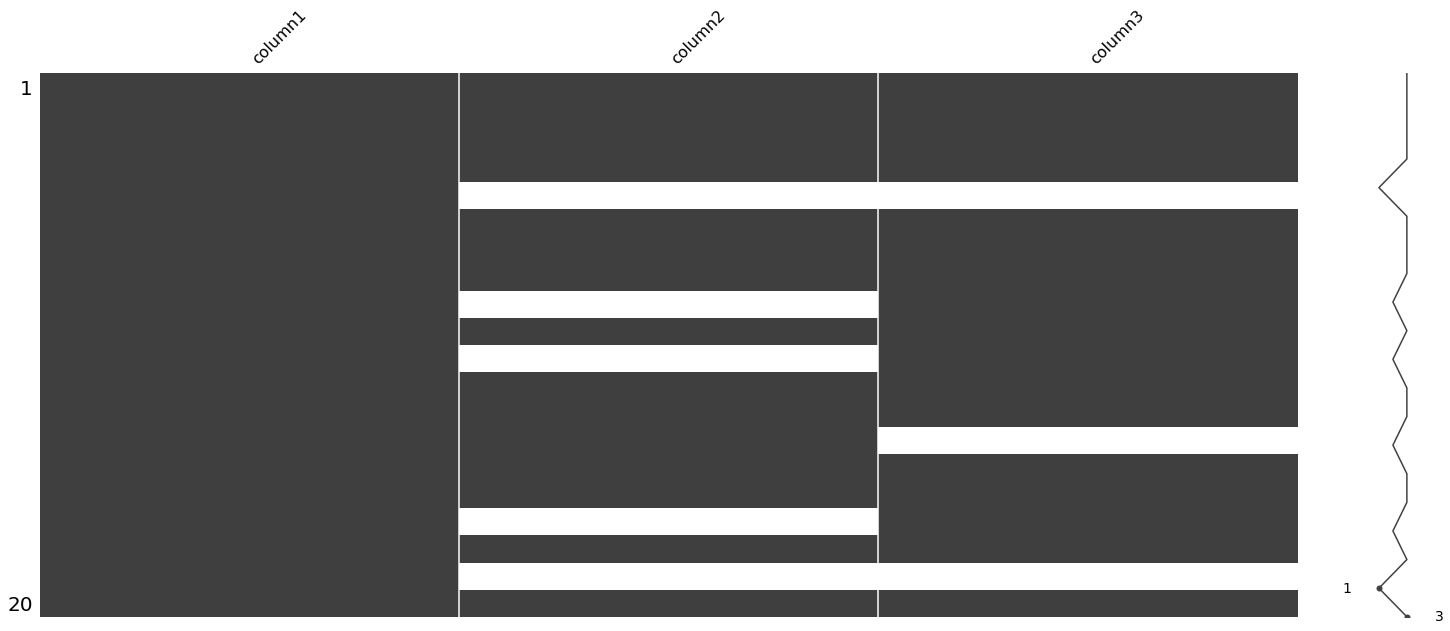

In [2]:
dictionary={"column1":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
            "column2":[1,2,3,4,np.nan,6,7,8,np.nan,10,np.nan,12,13,14,15,16,np.nan,18,np.nan,20],
            "column3":[1,2,3,4,np.nan,6,7,8,9,10,11,12,13,np.nan,15,16,17,18,np.nan,20]}
data_missingno=pd.DataFrame(dictionary)
# dictionary'den data frame yaratılmıştır.

# import missingno lib
import missingno as msno
msno.matrix(data_missingno)
plt.show()

burada boş olarak gözükenler nan değerlerin bulunduğu satırlardır.

In [3]:
data_missingno

,column1,column2,column3
0,1,1.0,1.0
1,2,2.0,2.0
2,3,3.0,3.0
3,4,4.0,4.0
4,5,NaN,NaN
5,6,6.0,6.0
6,7,7.0,7.0
7,8,8.0,8.0
8,9,NaN,9.0
9,10,10.0,10.0


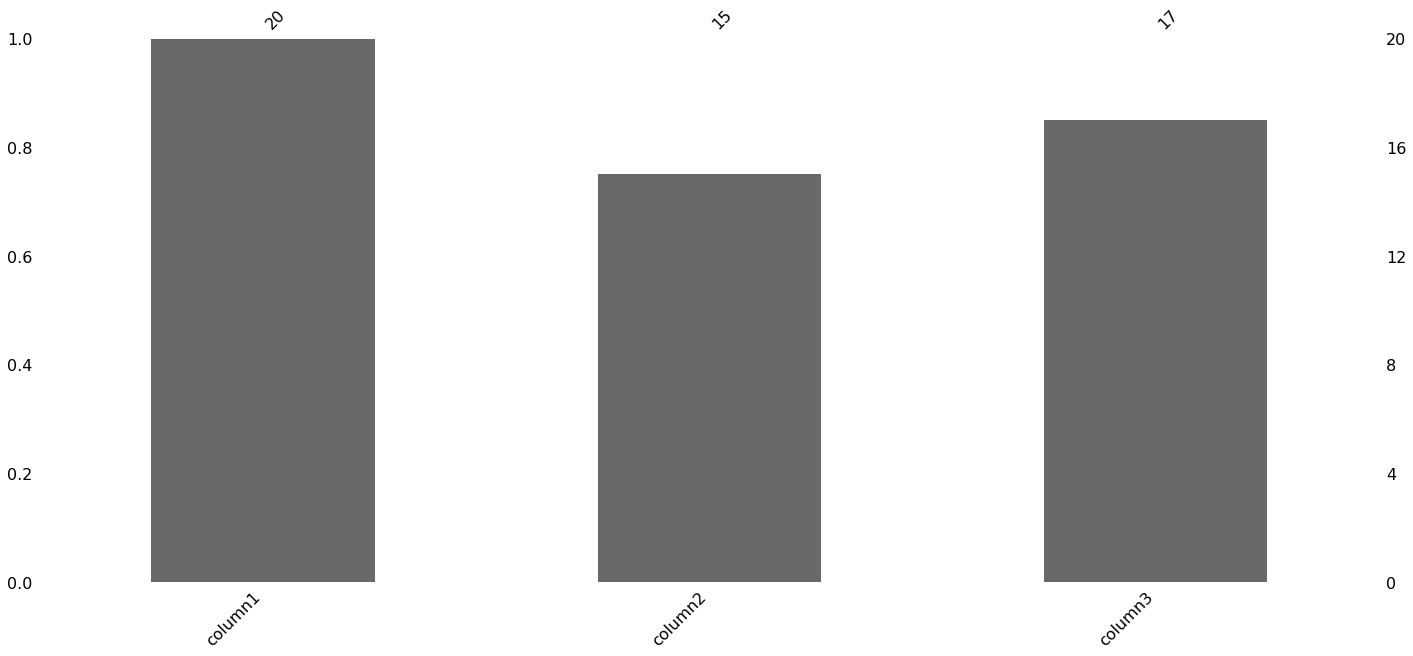

In [4]:
msno.bar(data_missingno)
plt.show()

her column'da 20 satır olması gerekirken ikinci column'da 5 kayıp veri var, üçüncü columnda 3 kayıp veri var.

# Parallel Plots (Pandas)


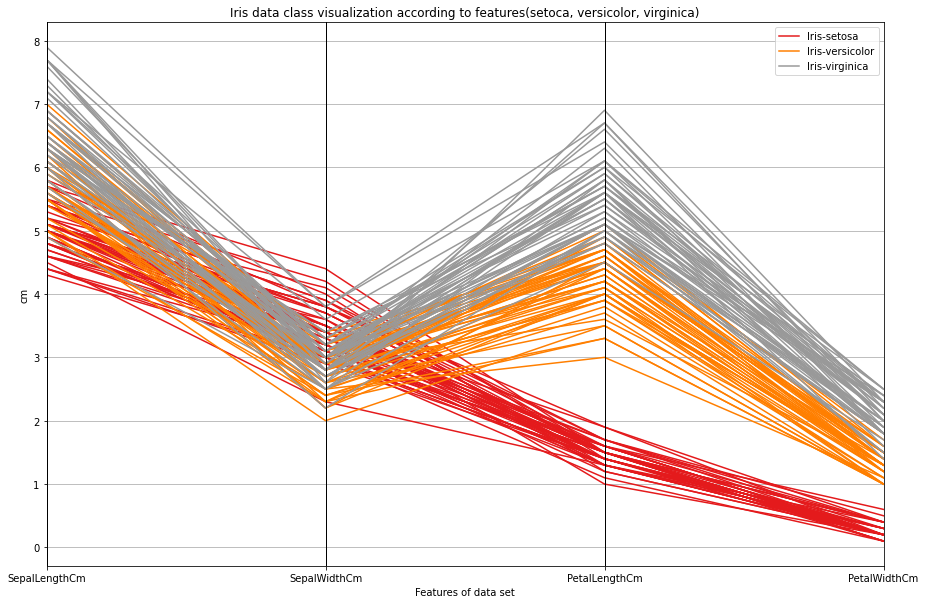

In [5]:
data= pd.read_csv('../input/iris/Iris.csv')
data= data.drop(['Id'], axis=1)

plt.figure(figsize=(15,10))
parallel_coordinates(data, 'Species', colormap= plt.get_cmap("Set1"))
plt.title("Iris data class visualization according to features(setoca, versicolor, virginica)")
plt.xlabel("Features of data set")
plt.ylabel("cm")
plt.savefig('graph.png')
plt.show()

# Network Charts
* Genelde social network analizlerinde kullanılır. 

In [6]:
corr=data.iloc[:,0:4].corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


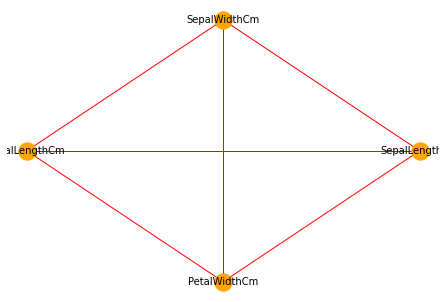

In [7]:
import networkx as nx

links= corr.stack().reset_index()
links.columns=['var1','var2','value']

threshold=-1   # buraya verdiğimiz değerler ile feature'ların correlation'larını belirtmiş oluyoruz, 0 yazsaydık 0'a göre başka bir grafik çizdirecekti.
links_filtered= links.loc[(links['value']>= threshold) &(links['var1']!=links['var2'])]

G= nx.from_pandas_edgelist(links_filtered,'var1','var2')
# from_pandas_dataframe yerine artık from_pandas_edgelist kullanlımaktadır.
nx.draw_circular(G, with_labels=True, node_color='orange', node_size=300, edge_color='red', linewidths=1, font_size=10)

## Venn(Matplotlib)

In [8]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


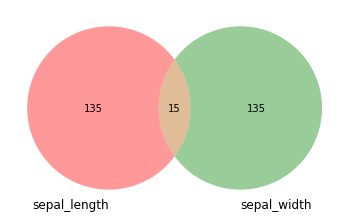

In [9]:
from matplotlib_venn import venn2
sepal_length= data.iloc[:,0]  # 0.column
sepal_width= data.iloc[:,1]   # 1.column
petal_length= data.iloc[:,2]  # 2.column
petal_width= data.iloc[:,3]   # 3.column

venn2(subsets=(len(sepal_length)-15, len(sepal_width)-15, 15), set_labels=('sepal_length', 'sepal_width'))
plt.show()                                               # bu 15 kesişim değeri istediğimiz değeri yazabiliriz ya da buldurabiliriz burada

## Donut Plot(Matplotlib)

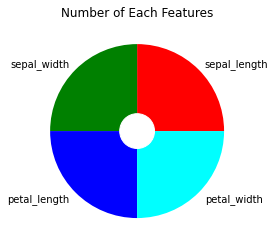

In [10]:
feature_names= "sepal_length","sepal_width","petal_length","petal_width"
feature_size= [len(sepal_length), len(sepal_width), len(petal_length), len(petal_width)]
circle= plt.Circle((0,0),0.2,color="white") #donut'ın iç tarafındaki beyaz circle
plt.pie(feature_size, labels=feature_names, colors=["red","green","blue","cyan"])
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Number of Each Features")
plt.show()

## Spider Chart (Matplotlib)


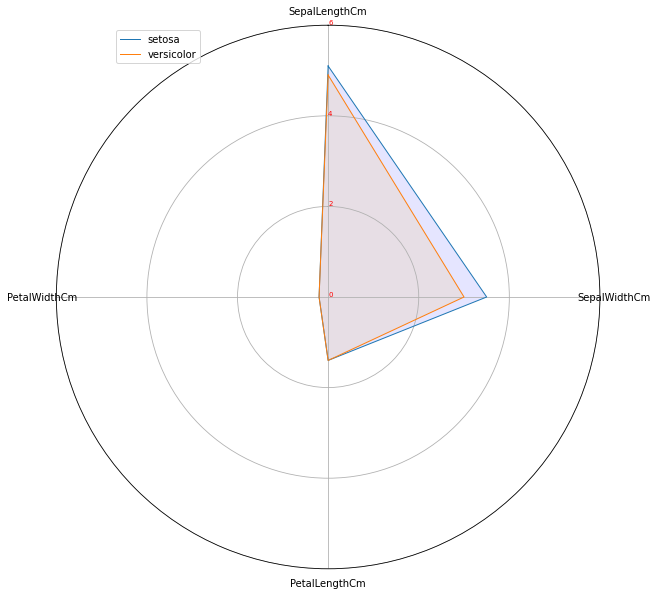

In [11]:
categories= list(data)[:4]
N= len(categories)
angles=[n/float(N)*2*pi for n in range(N)]
angles= angles+angles[:1]
plt.figure(figsize=(10,10))
ax=plt.subplot(111,polar=True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([0,2,4,6],["0","2","4","6"], color="red", size=7)
plt.ylim(0,6)

values= data.loc[0].drop("Species").values.flatten().tolist()
values= values+ values[:1]
ax.plot(angles, values, linewidth=1, linestyle="solid", label="setosa")
ax.fill(angles, values,"b",alpha=0.1)

values= data.loc[1].drop("Species").values.flatten().tolist()
values= values+values[:1]
ax.plot(angles, values, linewidth=1, linestyle="solid", label="versicolor")
ax.fill(angles,values,"orange",alpha=0.1)
plt.legend(loc="upper left", bbox_to_anchor=(0.1,1.0))
plt.show()